Revisamos las graficas de la Vexp en funcion de line base, agrupando por estrella y longitud de onda. Aseguramos ademas que sea el mismo dia!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import glob
import scipy
from scipy.special import jv
import re
from IPython.core.display import display, HTML
from PIL import Image
import os.path
from scipy.optimize import curve_fit
import warnings
import pickle
from matplotlib import container

# from functools import partial

plt.rcParams['figure.figsize'] = (6, 4)  # 8*4
plt.rcParams['figure.dpi'] = 100


C:\Users\ivian\AppData\Local\Temp\ipykernel_21096\4022120285.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
styledict_exp1=dict(marker='x',color='black',linestyle='None',
ecolor=(0, 0, 0, 0.4),elinewidth=1,capsize=2.5,)


styledict_exp2=styledict_exp1.copy()
styledict_exp2.update(dict(marker='^',ecolor=(0, 0, 0, 0.4),ms=4))

ls1='--'
ls2='-.'

In [3]:
r0dict={}
r0errdict={}

In [4]:
def get_V(B,r0):
    return np.exp(-3.44*(B/r0)**(5/3))

In [5]:
def get_errorr0(r0, B_exp,V_exp,delta=0.001):
    B_exp=np.array(B_exp)
    V_exp=np.array(V_exp)    
    V_teor=np.exp(-3.44*(B_exp/r0)**(5/3))
    errors2sum=np.sum((V_teor-V_exp)**2)
    desvest=(errors2sum/(len(B_exp)-1))**0.5
    dv=(np.exp(-3.44*(B_exp/r0)**(5/3))-np.exp(-3.44*(B_exp/(r0+delta))**(5/3)))/delta
    print(dv)
    dv2=dv**2
    sumadv2=np.sum(dv2)
    errorr0=desvest/sumadv2**0.5
    return errorr0

In [6]:
def get_err(pcov):
    return np.sqrt(np.diag(pcov))[0]

In [7]:
B=np.linspace(0,0.3,1000)
# V_sirio=get_V(B,0.284126682)
# V_betel=get_V(B,0.478384865)

In [8]:
# B_sirio_exp=[0.22,0.238,0.205,0.187]
# V_sirio_exp=[0.094463463,0.015108305,0.138378891,0.226590674]

# B_bet_exp=[0.147,0.238]
# V_bet_exp=[0.641221919,0.32258731]


In [9]:
df_prev=pd.read_hdf('intermedio/tabla.h5', 'df')
print(df_prev.keys())
dispcols=['Imagen','Objeto','DATE','Filtro','L (mm)','V_media','S','E_acc','D (mm)',"V_media_antigua","S_antigua"]

Index(['Objeto', 'Filtro', 'Disco', 'D (mm)', 'L (mm)', 'L1 (mm)', 'L2 (mm)',
       'Notas', 'PATH', 'Imagen', '$\lambda$', '$d\lambda$', 'alphap',
       'alphap_mas', 'filtername', 'starname', 'DATE', 'DAY', 'HOUR',
       'V_media_antigua', 'S_antigua', 'S_tip_antigua', 'V_media', 'S',
       'S_tip', 'E_acc'],
      dtype='object')


In [10]:
#df_S=pd.read_csv("v_individualesyajuster0inicial.csv",sep=';',index_col='indice')[['V_media','S']]

df=df_prev#.join(df_S)

In [11]:
print(df_prev.keys())

Index(['Objeto', 'Filtro', 'Disco', 'D (mm)', 'L (mm)', 'L1 (mm)', 'L2 (mm)',
       'Notas', 'PATH', 'Imagen', '$\lambda$', '$d\lambda$', 'alphap',
       'alphap_mas', 'filtername', 'starname', 'DATE', 'DAY', 'HOUR',
       'V_media_antigua', 'S_antigua', 'S_tip_antigua', 'V_media', 'S',
       'S_tip', 'E_acc'],
      dtype='object')


# Sirio (Dia 23)

In [12]:
cond=(df['DAY']==23) & (df['Filtro']=='Halfa-35 nm') 
df_sel=df.loc[cond]
df_sel[dispcols+['DATE']]

,Imagen,Objeto,DATE,Filtro,L (mm),V_media,S,E_acc,D (mm),V_media_antigua,S_antigua,DATE
14.0,14,Sirio,17-03-23,Halfa-35 nm,238.0,0.015108,0.001886,0.010804,30.0,0.015108,0.001886,17-03-23
15.0,15,Sirio,17-03-23,Halfa-35 nm,133.0,0.268869,0.013899,0.079645,30.0,0.268869,0.013899,17-03-23
16.0,16,Sirio,17-03-23,Halfa-35 nm,222.0,0.139991,0.021037,0.120546,50.0,0.139991,0.021037,17-03-23
17.0,17,Sirio,17-03-23,Halfa-35 nm,162.0,0.205609,0.051177,0.293257,65.0,0.205609,0.051177,17-03-23


In [13]:
date=df_sel['DATE'].iloc[0]
date[:2]+'-'+date[3:5]+'-'+date[6:]

'17-03-23'

### pruebesita

In [14]:
B_exp=df_sel['L (mm)']/1000
V_exp=df_sel['V_media']

popt, pcov =curve_fit(get_V, B_exp,V_exp,p0=0.2,bounds=(0.01,1))

perr = np.sqrt(np.diag(pcov))
print(popt[0],'+-',perr[0])
err=get_errorr0(popt[0], B_exp,V_exp,delta=1e-8)
print(err)
print(err-perr[0])

0.25220956245896947 +- 0.015168958355392427
[-0.9085143  -2.394583   -1.13893187 -2.09821755]
0.015168958363374636
7.98220864406396e-12


r0= 0.25220956245896947


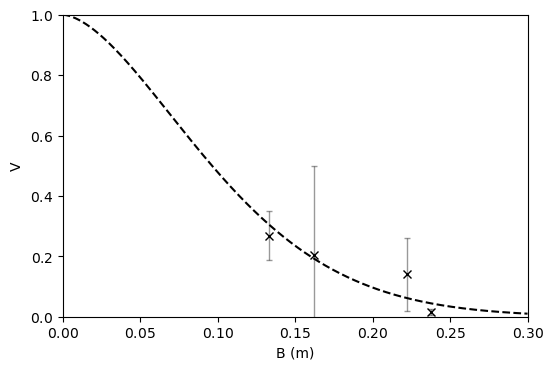

In [15]:
B_exp=df_sel['L (mm)']/1000
V_exp=df_sel['V_media']

popt, pcov =curve_fit(get_V, B_exp,V_exp,p0=0.2,bounds=(0.01,1))
print("r0=",*popt)
V_fit=get_V(B,popt[0])
for n in df_sel['Imagen']:
    if n in r0dict:
        warnings.warn("Calculando r0 para una imagen dos veces")
    r0dict[n]=popt[0]
    r0errdict[n]=get_err(pcov)


fig, ax = plt.subplots()
plt.ticklabel_format(useMathText=True)
plt.xlim([0, 0.3])
plt.ylim([0, 1])
plt.plot(B, V_fit,ls1,color='black',label=f"Best fit curve with $r_0$ = {popt[0]:0.3F} m")
plt.errorbar(B_exp, V_exp, yerr=df_sel['E_acc'],label="Experimental points",**styledict_exp1)
#ax.legend()

date=df_sel['DATE'].iloc[0]
# ax.set_title('Sirius'+f' ({date})')
ax.set_xlabel("B (m)")
ax.set_ylabel("V")
plt.savefig("productos/ajustes/ajuste-sirio-23.pdf")

# a parte-  Betelgeuse (Dia 15)

In [16]:
cond=(df['DAY']==15) & (df['Filtro']=='Halfa-35 nm') & (df['Objeto']=='Betelgeuse')&(df['Imagen']!=9)
df_sel=df.loc[cond]#.loc[df['Imagen'].isin([8,10])]
df_sel[dispcols]

,Imagen,Objeto,DATE,Filtro,L (mm),V_media,S,E_acc,D (mm),V_media_antigua,S_antigua
8.0,8,Betelgeuse,17-03-15,Halfa-35 nm,147.0,0.641222,0.008581,0.049168,51.0,0.641222,0.008581
10.0,10,Betelgeuse,17-03-15,Halfa-35 nm,238.0,0.322587,0.003800,0.021777,30.0,0.322587,0.003800
11.0,11,Betelgeuse,17-03-15,Halfa-35 nm,133.0,0.211979,0.018689,0.107091,30.0,0.211979,0.018689


nuevo r0= 0.3629309047496448
inicial r0= 0.3629309047496448


'17-03-15'

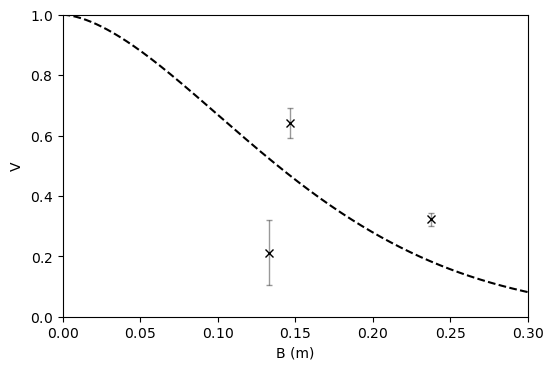

In [17]:
B_exp=df_sel['L (mm)']/1000
V_exp=df_sel['V_media']

popt, pcov =curve_fit(get_V, B_exp,V_exp,p0=0.2,bounds=(0.01,1))
poptold, pcovold =curve_fit(get_V, B_exp,df_sel['V_media'],p0=0.2,bounds=(0.01,1))
print("nuevo r0=",*popt)
print("inicial r0=",*poptold)
V_fit=get_V(B,popt[0])
for n in df_sel['Imagen']:
    if n in r0dict:
        warnings.warn("Calculando r0 para una imagen dos veces")
    r0dict[n]=popt[0]
    r0errdict[n]=get_err(pcov)

fig, ax = plt.subplots()
plt.ticklabel_format(useMathText=True)
plt.xlim([0, 0.3])
plt.ylim([0, 1])
plt.plot(B, V_fit,ls1,c='black',label=f"Best fit curve with $r_0$ = {popt[0]:0.3F} m")
plt.errorbar(B_exp, V_exp, yerr=df_sel['E_acc'],label="Experimental points",**styledict_exp1)
#ax.legend()
date=df_sel['DATE'].iloc[0]
# ax.set_title('Betelgeuse'+f' ({date})')
ax.set_xlabel("B (m)")
ax.set_ylabel("V")
plt.savefig("productos/ajustes/ajuste-betel-15.pdf")
date

# x Betelgeuse comparacion (Dia 15)

In [18]:
cond=(df['DAY']==15) & (df['Filtro']=='Halfa-35 nm') & (df['Objeto']=='Betelgeuse')&(df['Imagen']!=9)
df_sel=df.loc[cond]#.loc[df['Imagen'].isin([8,10])]
df_sel[dispcols]

,Imagen,Objeto,DATE,Filtro,L (mm),V_media,S,E_acc,D (mm),V_media_antigua,S_antigua
8.0,8,Betelgeuse,17-03-15,Halfa-35 nm,147.0,0.641222,0.008581,0.049168,51.0,0.641222,0.008581
10.0,10,Betelgeuse,17-03-15,Halfa-35 nm,238.0,0.322587,0.003800,0.021777,30.0,0.322587,0.003800
11.0,11,Betelgeuse,17-03-15,Halfa-35 nm,133.0,0.211979,0.018689,0.107091,30.0,0.211979,0.018689


nuevo r0= 0.3629309047496448
inicial r0= 0.3629309047496448


Text(0, 0.5, 'V')

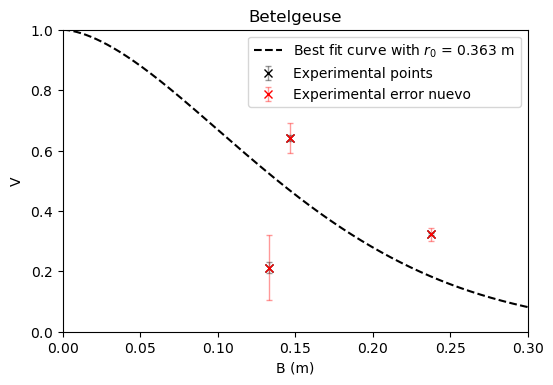

In [19]:
B_exp=df_sel['L (mm)']/1000
V_exp=df_sel['V_media']

popt, pcov =curve_fit(get_V, B_exp,V_exp,p0=0.2,bounds=(0.01,1))
poptold, pcovold =curve_fit(get_V, B_exp,df_sel['V_media_antigua'],p0=0.2,bounds=(0.01,1))
print("nuevo r0=",*popt)
print("inicial r0=",*poptold)
V_fit=get_V(B,popt[0])
# for n in df_sel['Imagen']:
#     if n in r0dict:
#         warnings.warn("Calculando r0 para una imagen dos veces")
#     r0dict[n]=popt[0]

fig, ax = plt.subplots()
plt.ticklabel_format(useMathText=True)
plt.xlim([0, 0.3])
plt.ylim([0, 1])
plt.plot(B, V_fit,ls1,c='black',label=f"Best fit curve with $r_0$ = {popt[0]:0.3F} m")
# plt.plot(B_bet_exp, V_bet_exp, color='r', linestyle='None',marker='x')
plt.errorbar(B_exp, V_exp, yerr=df_sel['S'],label="Experimental points",**styledict_exp1)
plt.errorbar(B_exp, V_exp, yerr=df_sel['E_acc'],label="Experimental error nuevo",marker='x',color='red',linestyle='None',
ecolor=(1, 0, 0, 0.4),elinewidth=1,capsize=2.5)
ax.legend()
ax.set_title('Betelgeuse')
ax.set_xlabel("B (m)")
ax.set_ylabel("V")
#plt.savefig("productos/ajustes/ajuste-betel-15.pdf")

# Comparacion lambda Sirio (Dia 29)

In [20]:
cond1=(df['DAY']==29) & (df['Filtro']=='Halfa-35 nm') & (df['Objeto']=='Sirio')&(df['Imagen']!=9)
df_sel1=df.loc[cond1]
df_sel1[dispcols]

,Imagen,Objeto,DATE,Filtro,L (mm),V_media,S,E_acc,D (mm),V_media_antigua,S_antigua
19.0,19,Sirio,17-03-29,Halfa-35 nm,162.0,0.372131,0.017874,0.102422,66.0,0.372131,0.017874
21.0,21,Sirio,17-03-29,Halfa-35 nm,205.0,0.138379,0.003587,0.020552,66.0,0.138379,0.003587
22.0,22,Sirio,17-03-29,Halfa-35 nm,187.0,0.226591,0.002237,0.012818,90.0,0.226591,0.002237


In [21]:
cond1=(df['DAY']==29) & (df['Filtro']=='Hbeta-8.5nm') & (df['Objeto']=='Sirio')&(df['Imagen']!=9)
df_sel2=df.loc[cond1]
df_sel2[dispcols+['PATH']]

,Imagen,Objeto,DATE,Filtro,L (mm),V_media,S,E_acc,D (mm),V_media_antigua,S_antigua,PATH
20.0,20,Sirio,17-03-29,Hbeta-8.5nm,162.0,0.072809,0.004383,0.025113,66.0,0.072809,0.004383,datos/imagenes\Sirio\20Sirio0002 Bx3 Hbeta8.5n...
23.0,23,Sirio,17-03-29,Hbeta-8.5nm,187.0,0.139635,0.002157,0.012362,90.0,0.139635,0.002157,datos/imagenes\Sirio\23Sirio0007 Bx3 Hbeta8.5n...


r0= 0.3151585549724359
r0= 0.21815983603464414


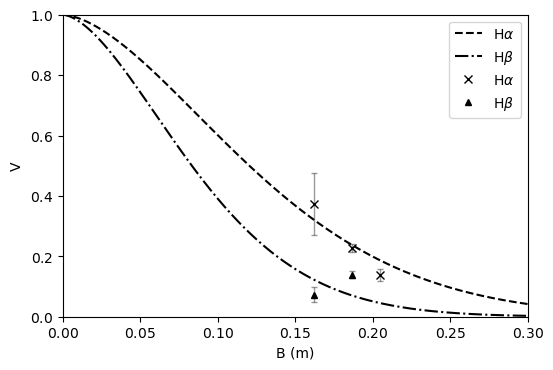

In [22]:
B_exp1=df_sel1['L (mm)']/1000
V_exp1=df_sel1['V_media']
lambda_1=df_sel1['filtername'].iloc[0]


popt, pcov =curve_fit(get_V, B_exp1,V_exp1,p0=0.2,bounds=(0.01,1))
print("r0=",*popt)
V_fit1=get_V(B,popt[0])
r01=popt[0]
for n in df_sel1['Imagen']:
    if n in r0dict:
        warnings.warn("Calculando r0 para una imagen dos veces")
    r0dict[n]=r01
    r0errdict[n]=get_err(pcov)

B_exp2=df_sel2['L (mm)']/1000
V_exp2=df_sel2['V_media']
lambda_2=df_sel2['filtername'].iloc[0]

popt, pcov =curve_fit(get_V, B_exp2,V_exp2,p0=0.2,bounds=(0.01,1))
print("r0=",*popt)
V_fit2=get_V(B,popt[0])
r02=popt[0]
for n in df_sel2['Imagen']:
    if n in r0dict:
        warnings.warn("Calculando r0 para una imagen dos veces")
    r0dict[n]=r02
    r0errdict[n]=get_err(pcov)

fig, ax = plt.subplots()
plt.ticklabel_format(useMathText=True)
plt.xlim([0, 0.3])
plt.ylim([0, 1])
plt.plot(B, V_fit1,ls1,c='black',label="H${\\alpha}$ ") #35 nm
plt.plot(B, V_fit2,ls2,c='black',label="H${\\beta}$") #8.5 nm

plt.errorbar(B_exp1, V_exp1, yerr=df_sel1['E_acc'],label="H${\\alpha}$",**styledict_exp1)
plt.errorbar(B_exp2, V_exp2, yerr=df_sel2['E_acc'],label="H${\\beta}$",**styledict_exp2)
# linestyle='None',color='green',marker='s',ms=1,ecolor=(0, .7, 0, 0.4),elinewidth=1.5,capsize=2.5)


# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
# use them in the legend
ax.legend(handles, labels)
#ax.legend()

date=df_sel1['DATE'].iloc[0]
# ax.set_title(f'{date}')
ax.set_xlabel("B (m)")
ax.set_ylabel("V")
plt.savefig("productos/ajustes/ajuste-sirio-comp-lambda.pdf")

# x Sirio (Dia 10)

In [23]:
cond=(df['DAY']==10) & (df['Filtro']=='Halfa-7 nm') 
df_sel=df.loc[cond]
df_sel[dispcols]

,Imagen,Objeto,DATE,Filtro,L (mm),V_media,S,E_acc,D (mm),V_media_antigua,S_antigua
1.0,1,Sirio,17-03-10,Halfa-7 nm,220.0,0.094463,0.017632,0.101035,22.0,0.094463,0.017632
2.0,2,Sirio,17-03-10,Halfa-7 nm,158.0,0.033639,0.014732,0.084420,22.0,0.033639,0.014732
3.0,3,Sirio,17-03-10,Halfa-7 nm,178.0,0.277885,0.002123,0.012167,61.0,0.277885,0.002123


r0= 0.24107341172972285


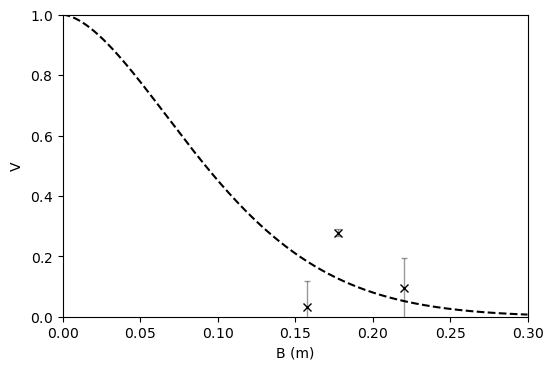

In [24]:
B_exp=df_sel['L (mm)']/1000
V_exp=df_sel['V_media']

popt, pcov =curve_fit(get_V, B_exp,V_exp,p0=0.2,bounds=(0.01,1))
print("r0=",*popt)
V_fit=get_V(B,popt[0])
for n in df_sel['Imagen']:
    if n in r0dict:
        warnings.warn("Calculando r0 para una imagen dos veces")
    r0dict[n]=popt[0]
    r0errdict[n]=get_err(pcov)
    
fig, ax = plt.subplots()
plt.ticklabel_format(useMathText=True)
plt.xlim([0, 0.3])
plt.ylim([0, 1])

plt.plot(B, V_fit,ls1,c='black',label=f"Best fit curve with $r_0$ = {popt[0]:0.3F} m")
plt.errorbar(B_exp, V_exp, yerr=df_sel['E_acc'],label="Experimental points",**styledict_exp1)

# ax.legend()
date=df_sel['DATE'].iloc[0]
# ax.set_title(f'Sirius ({date})')
ax.set_xlabel("B (m)")
ax.set_ylabel("V")
plt.savefig("productos/ajustes/ajuste-sirio-10.pdf")

# a parte - Rigel (Dia 15)

In [25]:
cond=(df['Objeto']=='Rigel') & (df['Filtro']=='Halfa-35 nm') 
df_sel=df.loc[cond]
df_sel[dispcols]

,Imagen,Objeto,DATE,Filtro,L (mm),V_media,S,E_acc,D (mm),V_media_antigua,S_antigua
6.0,6,Rigel,17-03-15,Halfa-35 nm,147.0,0.439454,0.007861,0.045045,51.0,0.439454,0.007861
7.0,7,Rigel,17-03-15,Halfa-35 nm,222.0,0.144100,0.008017,0.045938,51.0,0.144100,0.008017


r0= 0.3330430770908755


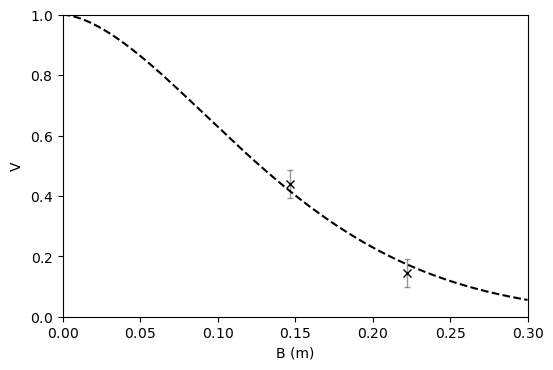

In [26]:
B_exp=df_sel['L (mm)']/1000
V_exp=df_sel['V_media']

popt, pcov =curve_fit(get_V, B_exp,V_exp,p0=0.2,bounds=(0.01,1))
print("r0=",*popt)
V_fit=get_V(B,popt[0])
for n in df_sel['Imagen']:
    if n in r0dict:
        warnings.warn("Calculando r0 para una imagen dos veces")
    r0dict[n]=popt[0]
    r0errdict[n]=get_err(pcov)
    
fig, ax = plt.subplots()
plt.ticklabel_format(useMathText=True)
plt.xlim([0, 0.3])
plt.ylim([0, 1])

plt.plot(B, V_fit,ls1,c='black',label=f"Best fit curve with $r_0$ = {popt[0]:0.3F} m")
plt.errorbar(B_exp, V_exp, yerr=df_sel['E_acc'],label="Experimental points",**styledict_exp1)

# ax.legend()
date=df_sel['DATE'].iloc[0]
# ax.set_title(f'Rigel ({date})')
ax.set_xlabel("B (m)")
ax.set_ylabel("V")
plt.savefig("productos/ajustes/ajuste-rigel-15.pdf")

# Rigel vs Betelgeuse 

In [27]:
cond1=(df['DAY']==15) & (df['Filtro']=='Halfa-35 nm') & (df['Objeto']=='Betelgeuse')&(df['Imagen']!=9)
df_sel1=df.loc[cond1]#.loc[df['Imagen'].isin([11,10])]#.loc[df['Imagen'].isin([8,10])]
df_sel1[dispcols+['HOUR']]

,Imagen,Objeto,DATE,Filtro,L (mm),V_media,S,E_acc,D (mm),V_media_antigua,S_antigua,HOUR
8.0,8,Betelgeuse,17-03-15,Halfa-35 nm,147.0,0.641222,0.008581,0.049168,51.0,0.641222,0.008581,21:41:53
10.0,10,Betelgeuse,17-03-15,Halfa-35 nm,238.0,0.322587,0.003800,0.021777,30.0,0.322587,0.003800,22:01:11
11.0,11,Betelgeuse,17-03-15,Halfa-35 nm,133.0,0.211979,0.018689,0.107091,30.0,0.211979,0.018689,22:05:53


In [28]:
cond1=(df['Objeto']=='Rigel') & (df['Filtro']=='Halfa-35 nm') 
df_sel2=df.loc[cond1]
df_sel2[dispcols+['HOUR']]

,Imagen,Objeto,DATE,Filtro,L (mm),V_media,S,E_acc,D (mm),V_media_antigua,S_antigua,HOUR
6.0,6,Rigel,17-03-15,Halfa-35 nm,147.0,0.439454,0.007861,0.045045,51.0,0.439454,0.007861,21:14:55
7.0,7,Rigel,17-03-15,Halfa-35 nm,222.0,0.144100,0.008017,0.045938,51.0,0.144100,0.008017,21:19:47


Betelgeuse r0= 0.3629309047496448
Rigel r0= 0.3330430770908755


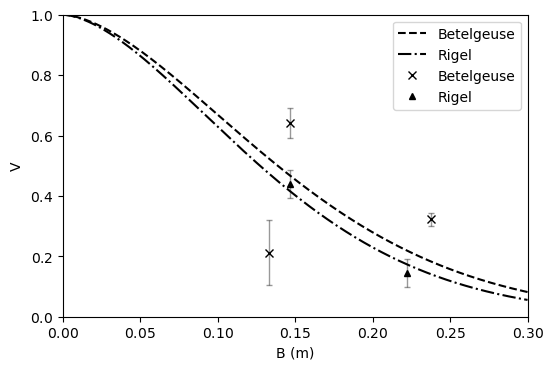

In [29]:
B_exp1=df_sel1['L (mm)']/1000
V_exp1=df_sel1['V_media']
lambda_1=df_sel1['filtername'].iloc[0]


popt, pcov =curve_fit(get_V, B_exp1,V_exp1,p0=0.2,bounds=(0.01,1))
print("Betelgeuse","r0=",*popt)
V_fit1=get_V(B,popt[0])
r01=popt[0]
# Aqui sobra porque ya los guardamos en los ajustes individuales
# for n in df_sel1['Imagen']:
#     if n in r0dict:
#         warnings.warn("Calculando r0 para una imagen dos veces")
#     r0dict[n]=r01

B_exp2=df_sel2['L (mm)']/1000
V_exp2=df_sel2['V_media']
lambda_2=df_sel2['filtername'].iloc[0]

popt, pcov =curve_fit(get_V, B_exp2,V_exp2,p0=0.2,bounds=(0.01,1))
print("Rigel","r0=",*popt)
V_fit2=get_V(B,popt[0])
r02=popt[0]
# Aqui sobra porque ya los guardamos en los ajustes individuales
# for n in df_sel2['Imagen']:
#     if n in r0dict:
#         warnings.warn("Calculando r0 para una imagen dos veces")
#     r0dict[n]=r02

fig, ax = plt.subplots()
plt.ticklabel_format(useMathText=True)
plt.xlim([0, 0.3])
plt.ylim([0, 1])
plt.plot(B, V_fit1,ls1,c='black',label=f"Betelgeuse")
plt.plot(B, V_fit2,ls2,c='black',label=f"Rigel")

plt.errorbar(B_exp1, V_exp1, yerr=df_sel1['E_acc'],label=f"Betelgeuse",**styledict_exp1)
plt.errorbar(B_exp2, V_exp2, yerr=df_sel2['E_acc'],label=f"Rigel",**styledict_exp2)


handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
# use them in the legend
ax.legend(handles, labels)
#ax.legend(prop={'size': 8})

# ax.set_title(f'{df_sel2["DATE"].iloc[0]})')
ax.set_xlabel("B (m)")
ax.set_ylabel("V")
plt.savefig("productos/ajustes/ajuste-betel-vs-rigel.pdf")

# Exportamos los resultados

In [30]:
with open('intermedio/valoresr0.pkl', 'wb') as f:
    pickle.dump(r0dict, f)

In [31]:
valoresr0=pd.DataFrame(r0dict.values(),index=r0dict.keys(),columns=["r0"])




In [32]:
erroresr0=pd.DataFrame(r0errdict.values(),index=r0errdict.keys(),columns=["error"])


In [33]:
r0df=valoresr0.join(erroresr0)
with open('productos/valoresr0.json','wb') as f:
    r0df.to_json(f,indent=4)
r0df.to_excel("productos/r0errors.xlsx",engine="openpyxl")
r0df

,r0,error
14,0.252210,0.015169
15,0.252210,0.015169
16,0.252210,0.015169
17,0.252210,0.015169
8,0.362931,0.101940
10,0.362931,0.101940
11,0.362931,0.101940
19,0.315159,0.015988
21,0.315159,0.015988
22,0.315159,0.015988


En teoria la formula del error seria esta? No sabemos

$E_V=2E_{Cut}V\left(\frac{1}{I_{Max}+I_{Min}}\right)$

In [34]:
df.to_excel("productos/tabla_completa.xlsx",engine="openpyxl")